## Reto 1: Pruebas A/B

### 1. Objetivos:
    - Practicar evaluar los resultados de una Prueba A/B
 
---
    
### 2. Desarrollo:

### a) Evaluando una prueba A/B de flujo de ventas

El archivo 'ab_test-sales_pipeline-2' tiene datos muy similares a los que vimos en el último ejemplo. Estamos evaluando dos flujos de ventas distintos: A y B. Cada vez que alguien compró el producto gracias a uno de los dos flujos, se registró como un `1` en la columna `conversion` y un `0` en la columna `no conversion`.

Evalúa la prueba A/B para saber si los resultados obtenidos son estadísticamente significativos. El Reto consiste en los siguientes pasos:

1. Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
2. Después aplica el test de permutación:
    1. Combina los resultados de ambos grupos en un mismo conjunto de datos
    2. Revuelve los datos
    3. Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
    4. El resto de los datos conforman nuestro nuevo grupo B.
    5. Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
    6. Repite los pasos 1-5 `R` veces para obtener una distribución de la estadística de interés.
3. Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
4. Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
5. Comenta tus hallazgos con tus compañeros y la experta.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/ab_test-sales_pipeline-2.csv')
df.head()

,test,conversion,no conversion
0,A,0,1
1,B,0,1
2,A,0,1
3,A,0,1
4,B,0,1


In [ ]:
total_count = df.groupby('test')[['conversion','no conversion']].sum()
total_count['success_rate'] = total_count['conversion']/ (total_count['conversion'] + total_count['no conversion'])
total_count

,conversion,no conversion,success_rate
test,,,
A,4163,30576,0.119836
B,4841,36747,0.116404


Combina los resultados de ambos grupos en un mismo conjunto de datos

Revuelve los datos

Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.

In [ ]:
## Prueba de permutacion

conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

value_counts = df['test'].value_counts()
for i in range(1000):
    a = df.sample(value_counts.loc['A'],replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())

    b = df.loc[~df.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())

Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.

In [ ]:
results = pd.DataFrame({
    'conv_a':conv_a,
    'no_conv_a':no_conv_a,
    'conv_b':conv_b,
    'no_conv_b':no_conv_b,
})

results

,conv_a,no_conv_a,conv_b,no_conv_b
0,4130,30609,4874,36714
1,4145,30594,4859,36729
2,4114,30625,4890,36698
3,4134,30605,4870,36718
4,4110,30629,4894,36694
...,...,...,...,...
995,4029,30710,4975,36613
996,4085,30654,4919,36669
997,4125,30614,4879,36709
998,4055,30684,4949,36639


In [ ]:
results['a_conv_rate'] = results['conv_a'] / (results['conv_a'] +results['no_conv_a'])
results['b_conv_rate'] = results['conv_b'] / (results['conv_b'] +results['no_conv_b'])

results['diff'] = 1 -(results['a_conv_rate']/results['b_conv_rate'])
results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,4130,30609,4874,36714,0.118887,0.117197,-0.014414
1,4145,30594,4859,36729,0.119318,0.116837,-0.021241
2,4114,30625,4890,36698,0.118426,0.117582,-0.007178
3,4134,30605,4870,36718,0.119002,0.117101,-0.016231
4,4110,30629,4894,36694,0.118311,0.117678,-0.005376
...,...,...,...,...,...,...,...
995,4029,30710,4975,36613,0.115979,0.119626,0.030484
996,4085,30654,4919,36669,0.117591,0.118279,0.005818
997,4125,30614,4879,36709,0.118743,0.117317,-0.012148
998,4055,30684,4949,36639,0.116728,0.119001,0.019101


Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.

In [ ]:
diferencia_en_proporcion = 1 - (total_count.loc['B']['success_rate']/total_count.loc['A']['success_rate'])
f'El test A fue {diferencia_en_proporcion*100:.4f}% mejor que B'

'El test A fue 2.8645% mejor que B'

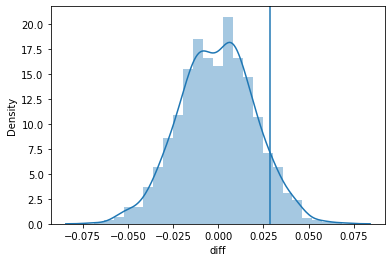

In [ ]:
sns.distplot(results['diff'])
plt.axvline(diferencia_en_proporcion)

In [ ]:
# Valor P
(results['diff'] >= diferencia_en_proporcion).sum() / results.shape[0] * 100

7.7

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>